<a href="https://colab.research.google.com/github/isemic/todo_task/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
xls = pd.ExcelFile("Coffee Shop Sales.xlsx")
xls.sheet_names
data=pd.read_excel("Coffee Shop Sales.xlsx",sheet_name="Transactions")
print(data.head())


   transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail  
0  Gourmet brewed coffee                  Ethiopia Rg 

In [ ]:
print(data.isnull().sum())

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   transaction_id    149116 non-null  int64          
 1   transaction_date  149116 non-null  datetime64[ns] 
 2   transaction_time  149116 non-null  timedelta64[ns]
 3   transaction_qty   149116 non-null  int64          
 4   store_id          149116 non-null  int64          
 5   store_location    149116 non-null  object         
 6   product_id        149116 non-null  int64          
 7   unit_price        149116 non-null  float64        
 8   product_category  149116 non-null  object         
 9   product_type      149116 non-null  object         
 10  product_detail    149116 non-null  object         
 11  datetime          149116 non-null  datetime64[ns] 
 12  sales             149116 non-null  float64        
 13  day_of_week       149116 non-null  object   

In [ ]:
data["transaction_time"]=data["transaction_time"].astype(str)
data["transaction_time"]=pd.to_timedelta(data["transaction_time"])
data["transaction_time"]

,transaction_time
0,0 days 07:06:11
1,0 days 07:08:56
2,0 days 07:14:04
3,0 days 07:20:24
4,0 days 07:22:41
...,...
149111,0 days 20:18:41
149112,0 days 20:25:10
149113,0 days 20:31:34
149114,0 days 20:57:19


In [ ]:
data['datetime']=data['transaction_date']+data['transaction_time']
data['datetime']


,datetime
0,2023-01-01 07:06:11
1,2023-01-01 07:08:56
2,2023-01-01 07:14:04
3,2023-01-01 07:20:24
4,2023-01-01 07:22:41
...,...
149111,2023-06-30 20:18:41
149112,2023-06-30 20:25:10
149113,2023-06-30 20:31:34
149114,2023-06-30 20:57:19


In [ ]:
data["sales"]=data["transaction_qty"]*data["unit_price"]
data["sales"]

,sales
0,6.00
1,6.20
2,9.00
3,2.00
4,6.20
...,...
149111,5.00
149112,6.00
149113,3.00
149114,3.75


In [ ]:
data.describe()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,product_id,unit_price,datetime,sales
count,149116.000000,149116,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,0 days 12:14:15.815794415,1.438276,5.342063,47.918607,3.382219,2023-04-16 00:04:47.989404160,4.686367
min,1.000000,2023-01-01 00:00:00,0 days 06:00:00,1.000000,3.000000,1.000000,0.800000,2023-01-01 07:06:11,0.800000
25%,37335.750000,2023-03-06 00:00:00,0 days 09:05:10.500000,1.000000,3.000000,33.000000,2.500000,2023-03-06 13:37:08,3.000000
50%,74727.500000,2023-04-24 00:00:00,0 days 11:15:28,1.000000,5.000000,47.000000,3.000000,2023-04-24 08:24:32.500000,3.750000
75%,112094.250000,2023-05-30 00:00:00,0 days 15:25:57,2.000000,8.000000,60.000000,3.750000,2023-05-30 07:16:13,6.000000
max,149456.000000,2023-06-30 00:00:00,0 days 20:59:32,8.000000,8.000000,87.000000,45.000000,2023-06-30 20:57:19,360.000000
std,43153.600016,NaN,0 days 03:45:57.901686173,0.542509,2.074241,17.930020,2.658723,NaN,4.227099


In [ ]:
data_location=data.groupby('store_location').agg({
    'sales':'sum',
    'transaction_id':'count'
})
data_location

,sales,transaction_id
store_location,,
Astoria,232243.91,50599
Hell's Kitchen,236511.17,50735
Lower Manhattan,230057.25,47782


In [ ]:
daily_sales_bylocation=data.groupby(['transaction_date','store_location'])['sales'].sum().unstack()
daily_sales_bylocation

store_location,Astoria,Hell's Kitchen,Lower Manhattan
transaction_date,,,
2023-01-01,868.40,851.45,788.35
2023-01-02,925.50,828.80,649.05
2023-01-03,902.75,906.25,756.00
2023-01-04,808.25,781.65,630.20
2023-01-05,903.05,714.90,800.90
...,...,...,...
2023-06-26,1975.10,1746.10,2154.70
2023-06-27,1861.55,1676.70,2437.40
2023-06-28,1758.10,1445.85,1524.95


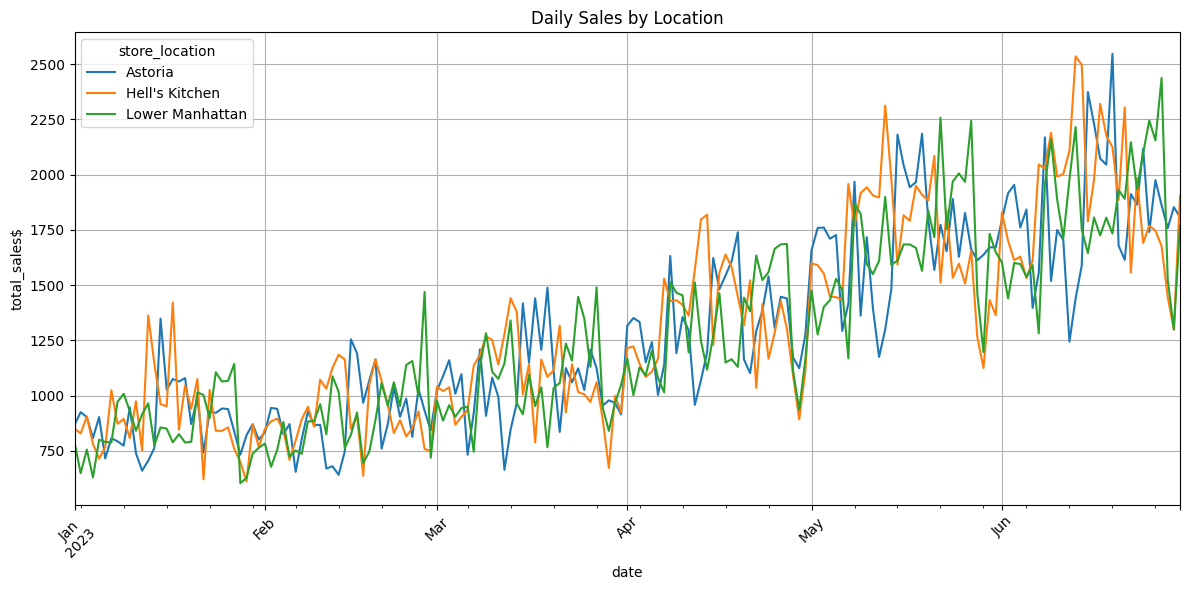

In [ ]:
daily_sales_bylocation.plot(figsize=(12,6),title="Daily Sales by Location")
plt.xlabel("date")
plt.ylabel("total_sales$")
plt.legend(title="store_location")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
data.groupby('transaction_date')['sales'].sum().reset_index()
data["day_of_week"]=data["transaction_date"].dt.day_name()
weekly_sales=data.groupby("day_of_week")["sales"].sum().reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]).reset_index()
data["month"]=data["datetime"].dt.to_period("M")
monthly_sales=data.groupby("month")["sales"].sum().reset_index()
weekly_sales,monthly_sales.unstack()

(  day_of_week      sales
 0      Monday  101677.28
 1     Tuesday   99455.94
 2   Wednesday  100313.54
 3    Thursday  100767.78
 4      Friday  101373.00
 5    Saturday   96894.48
 6      Sunday   98330.31,
 month  0      2023-01
        1      2023-02
        2      2023-03
        3      2023-04
        4      2023-05
        5      2023-06
 sales  0     81677.74
        1     76145.19
        2     98834.68
        3    118941.08
        4    156727.76
        5    166485.88
 dtype: object)

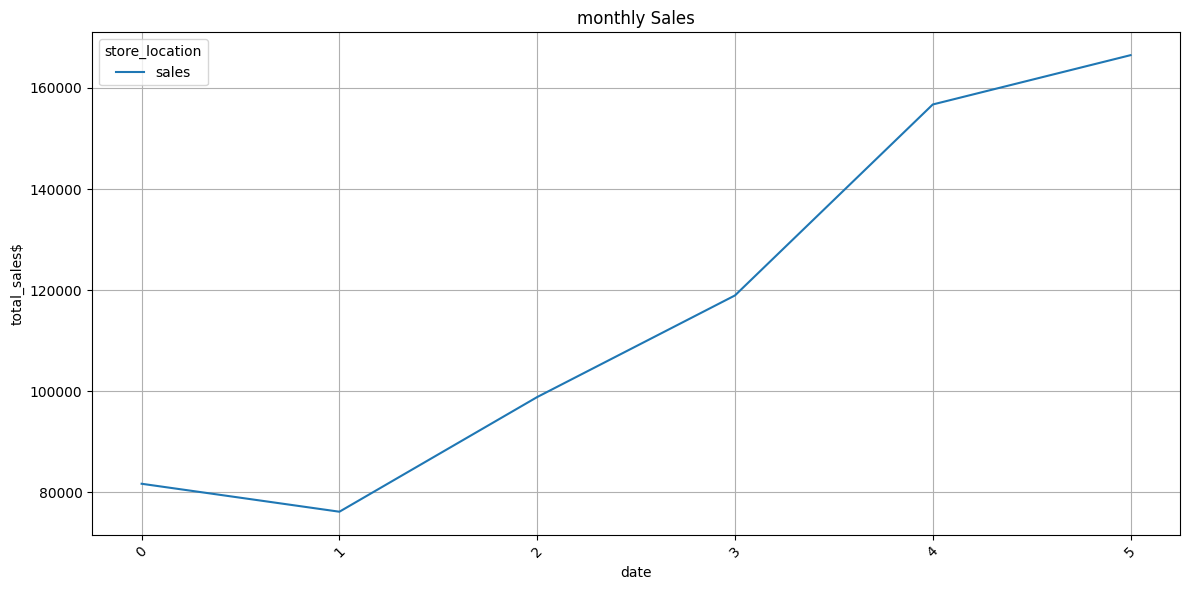

In [ ]:
monthly_sales.plot(figsize=(12,6),title="monthly Sales")
plt.xlabel("date")
plt.ylabel("total_sales$")
plt.legend(title="store_location")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
data_category=data.groupby("product_category").agg({
    'sales':'sum',
    'transaction_id':'count'

}).sort_values(by="sales",ascending=False)
data_category

,sales,transaction_id
product_category,,
Coffee,269952.45,58416
Tea,196405.95,45449
Bakery,82315.64,22796
Drinking Chocolate,72416.00,11468
Coffee beans,40085.25,1753
Branded,13607.00,747
Loose Tea,11213.60,1210
Flavours,8408.80,6790
Packaged Chocolate,4407.64,487


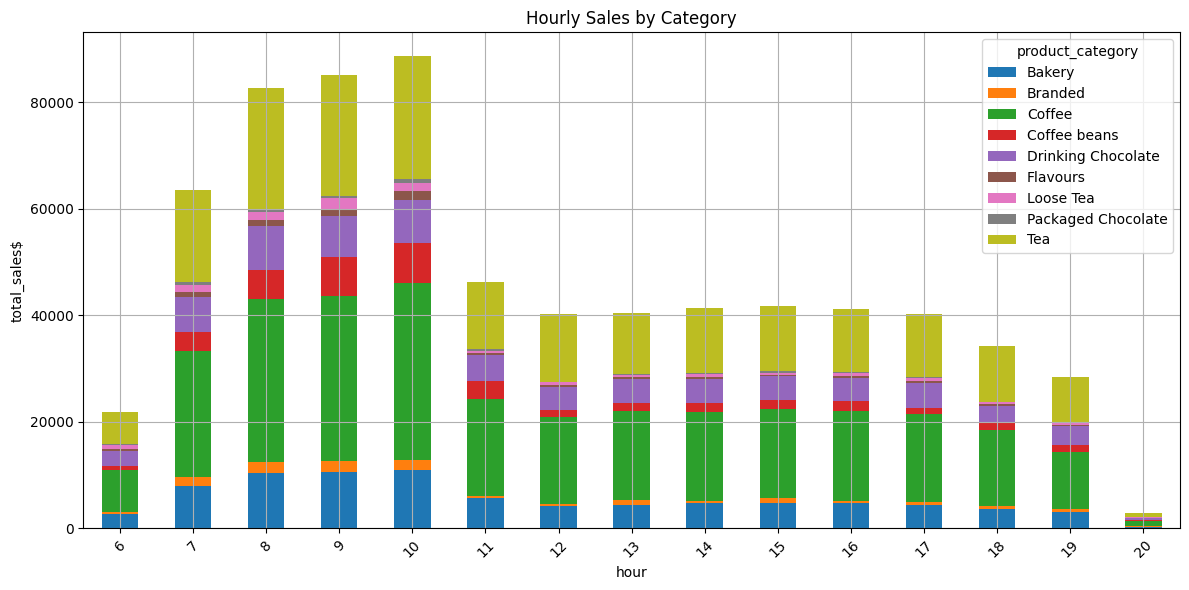

In [ ]:
data["hour"]=data["datetime"].dt.hour
hourly_sales_by_category=data.groupby(['hour','product_category'])['sales'].sum().unstack()
hourly_sales_by_category.plot(kind="bar",stacked="True",figsize=(12,6),title="Hourly Sales by Category")
plt.xlabel("hour")
plt.ylabel("total_sales$")
plt.legend(title="product_category")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
data_category["avg_sales"]=data_category["sales"]/data_category["transaction_id"]
data_category

,sales,transaction_id,avg_sales
product_category,,,
Coffee,269952.45,58416,4.621207
Tea,196405.95,45449,4.321458
Bakery,82315.64,22796,3.610969
Drinking Chocolate,72416.00,11468,6.314615
Coffee beans,40085.25,1753,22.866657
Branded,13607.00,747,18.215529
Loose Tea,11213.60,1210,9.267438
Flavours,8408.80,6790,1.238409
Packaged Chocolate,4407.64,487,9.050595


In [ ]:
sales_by_product=data.groupby("product_type").agg({
    'sales':'sum',
    'unit_price':'mean'
}
).sort_values(by="sales",ascending=False)
sales_by_product

,sales,unit_price
product_type,,
Barista Espresso,91406.20,3.655200
Brewed Chai tea,77081.95,2.936993
Hot chocolate,72416.00,4.148827
Gourmet brewed coffee,70034.60,2.696641
Brewed Black tea,47932.00,2.744670
Brewed herbal tea,47539.50,2.744731
Premium brewed coffee,38781.15,3.122452
Organic brewed coffee,37746.50,2.898021
Scone,36866.12,3.534638


In [ ]:
product_sales_data=data.groupby(["product_category","product_type"])["sales"].sum().reset_index()
product_sales_data

,product_category,product_type,sales
0,Bakery,Biscotti,19793.53
1,Bakery,Pastry,25655.99
2,Bakery,Scone,36866.12
3,Branded,Clothing,6163.00
4,Branded,Housewares,7444.00
5,Coffee,Barista Espresso,91406.20
6,Coffee,Drip coffee,31984.00
7,Coffee,Gourmet brewed coffee,70034.60
8,Coffee,Organic brewed coffee,37746.50
9,Coffee,Premium brewed coffee,38781.15


<ipython-input-89-c6d60f841509>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="product_type")


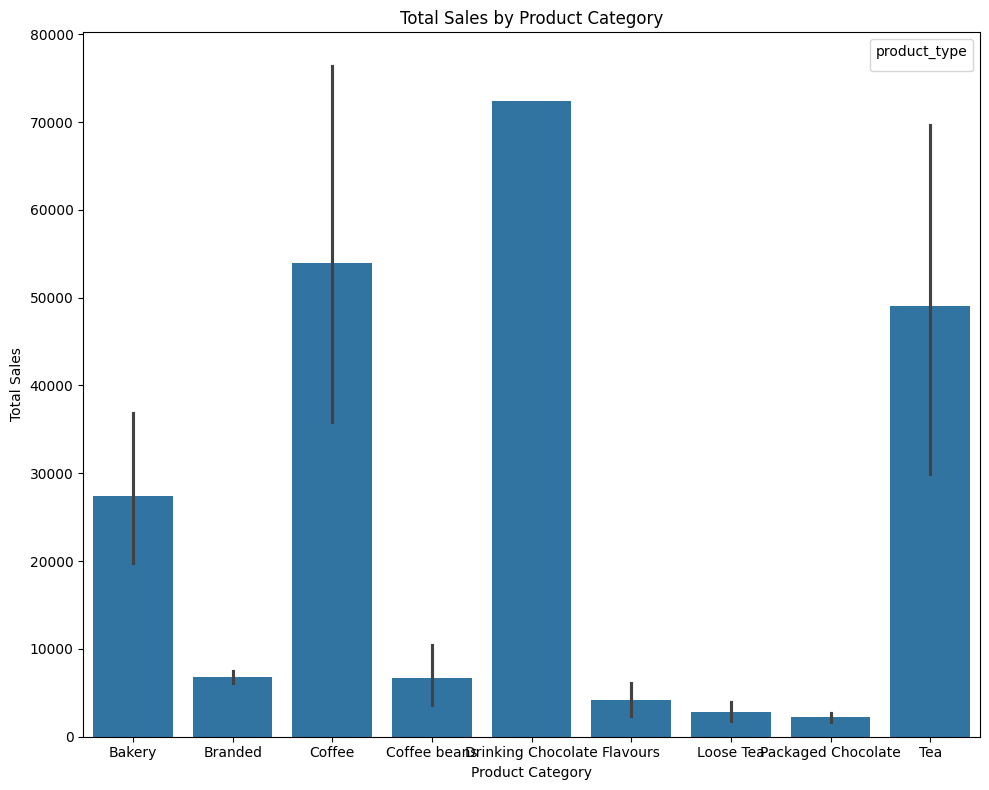

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.barplot(x="product_category",y="sales",data=product_sales_data)
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.legend(title="product_type")
plt.tight_layout()
plt.show()

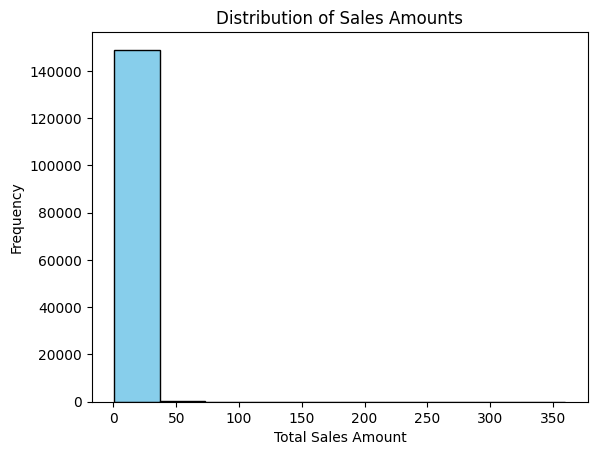

In [ ]:
import matplotlib.pyplot as plt

plt.hist(data['total_sales'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Total Sales Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Sales Amounts')
plt.show()


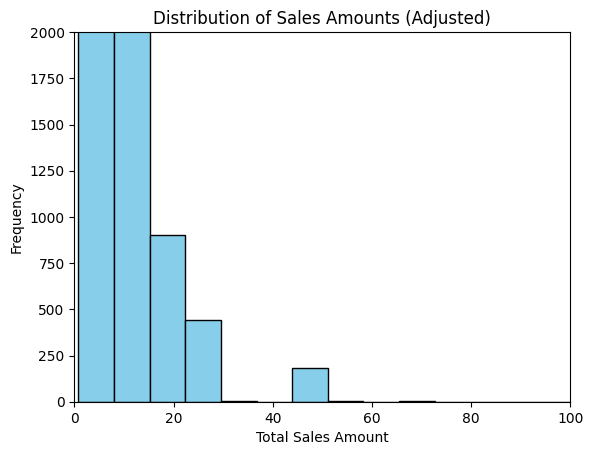

In [ ]:
plt.hist(data['total_sales'], bins=50, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Adjust x-axis to focus on most frequent values
plt.ylim(0, 2000)  # Adjust y-axis if needed
plt.xlabel('Total Sales Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Sales Amounts (Adjusted)')
plt.show()


In [ ]:
popular=data['product_category'].value_counts().idxmax()
popular

'Coffee'

<Axes: xlabel='product_detail'>

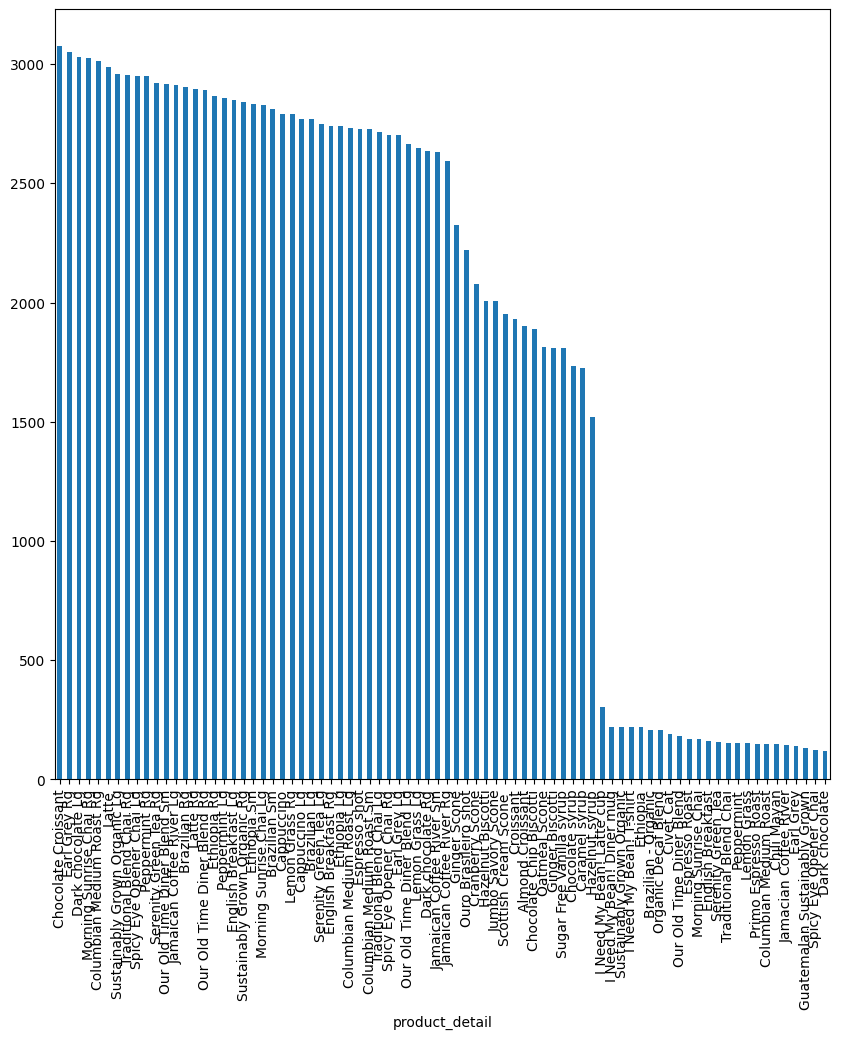

In [ ]:
plt.figure(figsize=(10,10))
data["product_detail"].value_counts().plot(kind="bar")


In [ ]:
data['product_detail'].describe()

,product_detail
count,149116
unique,80
top,Chocolate Croissant
freq,3076


<Axes: ylabel='count'>

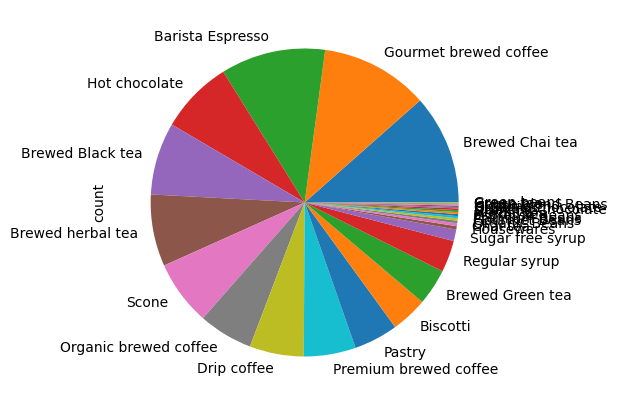

In [ ]:
plt.figure(figsize=(10,5))
data['product_type'].value_counts().plot(kind='pie')